In [15]:
import nltk
from nltk.corpus import brown
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
nltk.download('brown') #Here we downloaded brown corpus 
nltk.download('universal_tagset') # Here have downloaded the Universal tagset.

[nltk_data] Downloading package brown to C:\Users\RAVI
[nltk_data]     KIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to C:\Users\RAVI
[nltk_data]     KIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [16]:
def plot_confusion_matrix(cm,
                          labels,
                          cmap=plt.cm.BuPu):
    """
    This function plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    x_tick_marks = np.arange(len(labels))
    y_tick_marks = np.arange(len(labels))
    plt.xticks(x_tick_marks, labels, rotation=45)
    plt.yticks(y_tick_marks, labels)
    #
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color ="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#Part-1 Trigram Tagger with Backoff

In [18]:
##########################################################
# Include your code to train Ngram taggers here
##########################################################
best = 0
best_domain = ""
worst = 1
worst_domain = ""
difference = 0
difference_domain = ""
for domain in brown.categories():
  print("\nDOMAIN: "+domain)
  # Created train_split/dev_split/test_split.
  sentences = brown.tagged_sents(categories=domain, tagset="universal")
  dev_idx = int(len(sentences) * .7)
  test_idx = int(len(sentences) * .8)
  train = sentences[:dev_idx]
  dev = sentences[dev_idx:test_idx]
  test = sentences[test_idx:]
  len_train = len(train)
  len_dev = len(dev)
  len_test = len(test)
  print(f"Train{len_train},Test{len_test},Dev{len_dev}")
  
  # Here we train the trigram tagger:
  t0 = nltk.DefaultTagger('NOUN')
  t1 = nltk.UnigramTagger(train, backoff=t0)#unigram backoff to default taggger
  t2 = nltk.BigramTagger(train, backoff=t1)#bigram backoff to unigram
  t3 = nltk.TrigramTagger(train, backoff=t2) #trigram backoff to bigram


  # get the dev and test accuracy and their difference
  # print out the domain/dev acc/test acc/ and difference
  test_accuracy = t3.evaluate(test)
  dev_accuracy = t3.evaluate(dev)
  difference_accuracy = test_accuracy-dev_accuracy
  print("Accuracy: test {:.5f} and dev {:.5f}. Difference:{:.5f}".format(test_accuracy,dev_accuracy,difference_accuracy))
  if test_accuracy > best:
    best = test_accuracy
    best_domain = domain
  if test_accuracy < worst:
    worst = test_accuracy
    worst_domain = domain
  if abs(difference_accuracy) > difference:
    difference = difference_accuracy
    difference_domain = domain
  
print("Best Accuracy: {}:{:.5f}. \nWorst Accuracy:{}:{:.5f}".format(best_domain,best,worst_domain,worst))
print("Largest difference:{}:{:.5f}".format(difference_domain,difference))


DOMAIN: adventure
Train3245,Test928,Dev464


C:\Users\RAVI KIRAN\AppData\Local\Temp\ipykernel_25664\3625064900.py:33: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  test_accuracy = t3.evaluate(test)
C:\Users\RAVI KIRAN\AppData\Local\Temp\ipykernel_25664\3625064900.py:34: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  dev_accuracy = t3.evaluate(dev)


Accuracy: test 0.90193 and dev 0.91135. Difference:-0.00942

DOMAIN: belles_lettres
Train5046,Test1442,Dev721
Accuracy: test 0.92353 and dev 0.92716. Difference:-0.00364

DOMAIN: editorial
Train2097,Test600,Dev300
Accuracy: test 0.89800 and dev 0.89662. Difference:0.00137

DOMAIN: fiction
Train2974,Test850,Dev425
Accuracy: test 0.91087 and dev 0.90607. Difference:0.00480

DOMAIN: government
Train2122,Test607,Dev303
Accuracy: test 0.90724 and dev 0.92511. Difference:-0.01787

DOMAIN: hobbies
Train2935,Test839,Dev419
Accuracy: test 0.90082 and dev 0.88693. Difference:0.01389

DOMAIN: humor
Train737,Test211,Dev105
Accuracy: test 0.83559 and dev 0.87372. Difference:-0.03813

DOMAIN: learned
Train5413,Test1547,Dev774
Accuracy: test 0.92423 and dev 0.91430. Difference:0.00993

DOMAIN: lore
Train3416,Test977,Dev488
Accuracy: test 0.91447 and dev 0.90381. Difference:0.01066

DOMAIN: mystery
Train2720,Test778,Dev388
Accuracy: test 0.91182 and dev 0.91286. Difference:-0.00104

DOMAIN: news
Train

# Part-2 Confusion Matrix

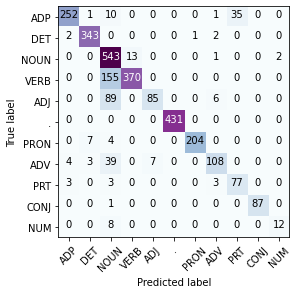

In [19]:
#function to untag a sentences.
def untag(sentences):
  untag_sent = list() #Flat list
  for sentence in sentences:
    words = list()
    for word in sentence:
      words.append(word[0]) #keep 0 for tag.
    untag_sent.append(words)
  return untag_sent

test_untagged = untag(test)
test_tagged = t2.tag_sents(test_untagged)


y_real = [word[1] for sentence in test for word in sentence ]
y_pred = [word[1] for sentence in test_tagged for word in sentence ]

labels = list(dict.fromkeys(y_real))

confusion_matrix = confusion_matrix(y_real,y_pred,labels=labels)
plot_confusion_matrix(confusion_matrix,labels=labels)

PART 3:  a) performing in-depth error analysis on the previous results.

1).Based on the code already available in pos_exercise.py, create a function to find sentences with errors. Use this function to collect all the sentences with errors in the dev set of the science_fiction domain of the brown corpus.

In [20]:
from math import log
from collections import defaultdict

def errors(sentences): # sentence: set of sentences tagged correctly 
  sentences_untagged = untag(sentences)
  sentences_tagged = t2.tag_sents(sentences_untagged)
  errors= [[word[0],word[1],word_tagged[1]] for sentence, sentence_tagged in zip(sentences,sentences_tagged) for word,word_tagged in zip(sentence,sentence_tagged) if word!=word_tagged]
  return errors

#let's produce two dictionaries with the number of times a word appears and the tags it has.
def Information(train):
  vocab = defaultdict(lambda: 0)
  tags = defaultdict(lambda: list())
  tag_freq = defaultdict(lambda: 0)
  tag_freq_non_repeted = defaultdict(lambda: 0)
  for sentence in train:
    for word,pos in sentence:
      if word not in vocab:
        tag_freq_non_repeted[pos]+=1
      vocab[word]+=1
      tag_freq[pos]+=1
      if pos not in tags[word]:
        tags[word].append(pos)
  return vocab,tags,tag_freq,tag_freq_non_repeted


vocab,tags,tag_count,tag_count_non_repeted=Information(train)
vocab_test,tags_test,tag_count_test,tag_count_non_repeted_test=Information(test)
num_words = sum([vocab[word] for word in vocab])
num_words_test = sum([vocab_test[word] for word in vocab_test])
errors = errors(test)


error_1 = list()
error_2 = list() #words


def dictionary(error,word,real,pred):
  keys = ('word','num','tags')
  for dict in error:
    if dict["word"][0]==word:
      if dict["real"][0]==real and dict["pred"][0]==pred:
        return dict
  return False


for word,real,pred in errors:
  if vocab[word]>0:
    error = dictionary(error_2,word,real,pred)
    if error:
      error["etimes"][0]+=1
    else:
      error = defaultdict(list)
      error["word"].append(word)
      error["num_train"].append(vocab[word])
      error["real_freq_train"].append((vocab[word]/num_words)*100)
      error["num_test"].append(vocab_test[word])
      error["real_freq_train"].append((vocab[word]/num_words_test)*100)
      error["tags"].append(tags[word])
      error["relative_tag_freq_train"].append(tag_count[real])
      error["relative_tag_freq_test"].append(tag_count_test[real])
      error["tag_freq_train_NR"].append(tag_count_non_repeted[real])
      error["tag_freq_test_NR"].append(tag_count_non_repeted_test[real])
      error["real"].append(real)
      error["pred"].append(pred)
      error["etimes"].append(1)
      error_2.append(error)
  else:
    error_1.append(word)




print("train:{}\ntest:{}".format(num_words,num_words_test))
print("\nTotal:{}\nNon-exist error:{}\nOther:{}".format(len(errors),len(error_1),len(error_2)))


train:9678
test:2912

Total:400
Non-exist error:303
Other:52


The errors appear because most of train data does not have the words that test data has.

In [21]:
print(";".join(list(error_2[0].keys())))
for info in error_2:
  for key in info:
    print(info[key][0],end=";")
  print("")

word;num_train;real_freq_train;num_test;tags;relative_tag_freq_train;relative_tag_freq_test;tag_freq_train_NR;tag_freq_test_NR;real;pred;etimes
work;6;0.06199628022318661;1;['NOUN', 'VERB'];1759;559;953;327;NOUN;VERB;1;
her;16;0.16532341392849764;20;['PRON', 'DET'];635;215;28;22;PRON;DET;7;
to;195;2.014879107253565;67;['PRT', 'ADP'];965;299;71;43;ADP;PRT;25;
half;6;0.06199628022318661;2;['ADV', 'PRT'];361;86;43;16;PRT;ADV;1;
first;8;0.08266170696424882;3;['ADV', 'ADJ'];575;161;180;81;ADV;ADJ;1;
around;5;0.05166356685265551;2;['ADP', 'ADV'];575;161;180;81;ADV;ADP;1;
one;24;0.24798512089274644;6;['NUM', 'NOUN'];1759;559;953;327;NOUN;NUM;2;
there;20;0.20665426741062204;7;['PRT', 'ADV'];361;86;43;16;PRT;ADV;1;
out;19;0.19632155404009094;14;['PRT', 'ADP'];965;299;71;43;ADP;PRT;8;
field;2;0.020665426741062205;3;['VERB', 'NOUN'];1759;559;953;327;NOUN;VERB;3;
outside;7;0.07232899359371771;1;['ADV', 'ADP'];580;180;337;113;ADJ;ADV;1;
All;6;0.06199628022318661;1;['PRT', 'ADV'];361;86;43;16;PRT;AD

In [22]:
def search(sentences,token,tag=None):
  if tag:
    sent_f = [sent for sent in sentences for w in sent if w==(token,tag)]
  else:
    sent_f = [sent for sent in sentences for w in sent if w[0]==token]
  return sent_f


token ="beautiful"
tag ="ADJ"
set_choosen = test
print(len(search(set_choosen,token,tag)))
for sentence1 in search(set_choosen,token,tag):
  print(sentence1)
  [print(w[0],end=" ") for w in sentence1]
  print()

5
[('``', '.'), ('No', 'DET'), ('directives', 'NOUN'), ('from', 'ADP'), ('Central', 'ADJ'), ('is', 'VERB'), ('scarcely', 'ADV'), ('a', 'DET'), ('cause', 'NOUN'), ('for', 'ADP'), ('regret', 'NOUN'), (',', '.'), ('but', 'CONJ'), ('there', 'PRT'), ('happen', 'VERB'), ('to', 'PRT'), ('be', 'VERB'), ('eight', 'NUM'), ('other', 'ADJ'), ('guys', 'NOUN'), ('biting', 'VERB'), ('their', 'DET'), ('fingernails', 'NOUN'), ('to', 'ADP'), ('the', 'DET'), ('quick', 'NOUN'), ('just', 'ADV'), ('waiting', 'VERB'), ('for', 'ADP'), ('an', 'DET'), ('invitation', 'NOUN'), ('to', 'PRT'), ('board', 'VERB'), ('you', 'PRON'), (',', '.'), ('you', 'PRON'), ('beautiful', 'ADJ'), ('thing', 'NOUN'), ("''", '.'), ('.', '.')]
`` No directives from Central is scarcely a cause for regret , but there happen to be eight other guys biting their fingernails to the quick just waiting for an invitation to board you , you beautiful thing '' . 
[("You're", 'PRT'), ('beautiful', 'ADJ'), (',', '.'), ('beautiful', 'ADJ'), (',', '.'